### Iris Species classification
- goal: iris species classification
- datasets: load_iris
- feature: sepal length, sepal width, petal length, petal width
- label: species
- learning method: supervised learning, classification
- learing method: 

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris(as_frame=True)

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
feature_df = iris_data['data']
label_sr = iris_data['target']

In [5]:
feature_df.shape, label_sr.shape

((150, 4), (150,))

In [6]:
print(feature_df.head(1), label_sr.head(3), sep='\n')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
0    0
1    0
2    0
Name: target, dtype: int32


In [82]:
# train, validataion, test split

# train : test = 7.25 : 2.25
# random_state = 24
# stratify = label

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, stratify=label_sr)

# train : val = 7.25 : 2.25
# random_state = 25
# stratify = y_train

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train)

In [83]:
print(f"X_train DS: {X_train.shape} {X_train.shape[0]/feature_df.shape[0]:.2f} %")
print(f"X_test DS: {X_test.shape} {X_test.shape[0]/feature_df.shape[0]:.2f} %")
print(f"X_val DS: {X_val.shape} {X_val.shape[0]/feature_df.shape[0]:.2f} %")

X_train DS: (84, 4) 0.56 %
X_test DS: (38, 4) 0.25 %
X_val DS: (28, 4) 0.19 %


In [84]:
print(f"y_train DS: {y_train.shape} {y_train.shape[0]/feature_df.shape[0]:.2f} %")
print(f"y_test DS: {y_test.shape} {y_test.shape[0]/feature_df.shape[0]:.2f} %")
print(f"y_val DS: {y_val.shape} {y_val.shape[0]/feature_df.shape[0]:.2f} %")

y_train DS: (84,) 0.56 %
y_test DS: (38,) 0.25 %
y_val DS: (28,) 0.19 %


In [85]:
# cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold

In [86]:
# model instance
dtc_model = DecisionTreeClassifier()

In [87]:


# k-fold instancce
# 여기서도 optima k를 구할 수 있을까?

kfold = KFold() # default k = 5
skFold = StratifiedKFold()

In [88]:
# repeat k
accuracy_list = []
train_acc_list = []
val_acc_list = []

for train_idx, val_index in kfold.split(feature_df):
    
    # print(f"train_index: {train_idx.tolist()}")
    
    X_train, y_train = feature_df.iloc[train_idx.tolist()], label_sr[train_idx.tolist()]
    X_val, y_val = feature_df.iloc[val_index.tolist()], label_sr[val_index.tolist()]
    
    dtc_model.fit(X_train, y_train)
    
    train_acc = dtc_model.score(X_train, y_train)
    val_acc = dtc_model.score(X_val, y_val)
    
    accuracy_list.append([train_acc, val_acc])
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    
    print(f"train_accuracy: {train_acc * 100:.2f} %")
    print(f"val_acc: {val_acc * 100:.2f}")
    print()

train_accuracy: 100.00 %
val_acc: 100.00

train_accuracy: 100.00 %
val_acc: 100.00

train_accuracy: 100.00 %
val_acc: 83.33

train_accuracy: 100.00 %
val_acc: 93.33

train_accuracy: 100.00 %
val_acc: 73.33



In [89]:
train_mean_acc = sum([value[0] for value in accuracy_list])/kfold.n_splits
val_mean_acc = sum([value[1] for value in accuracy_list])/kfold.n_splits

print(f"tarin accuracy: {train_mean_acc*100:.2f} %, valitation accuracy: {val_mean_acc*100:.2f} %")

tarin accuracy: 100.00 %, valitation accuracy: 90.00 %


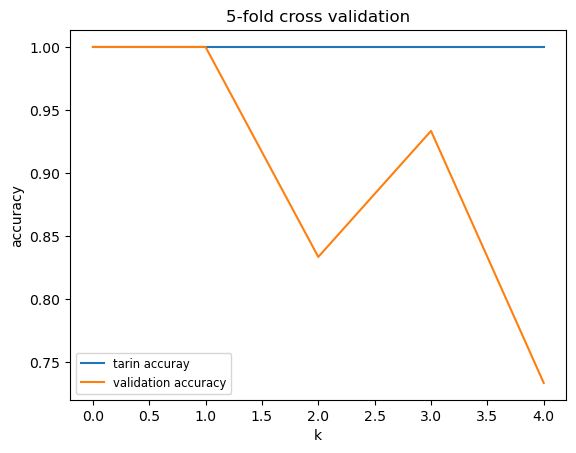

In [90]:
plt.plot(train_acc_list, label='tarin accuray')
plt.plot(val_acc_list, label='validation accuracy')

plt.title('5-fold cross validation')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(fontsize='small')

plt.show()

In [91]:
# repeat k
accuracy_list = []
train_acc_list = []
val_acc_list = []

for train_idx, val_index in skFold.split(feature_df, label_sr):
    
    # print(f"train_index: {train_idx.tolist()}")
    
    X_train, y_train = feature_df.iloc[train_idx.tolist()], label_sr[train_idx.tolist()]
    X_val, y_val = feature_df.iloc[val_index.tolist()], label_sr[val_index.tolist()]
    
    dtc_model.fit(X_train, y_train)
    
    train_acc = dtc_model.score(X_train, y_train)
    val_acc = dtc_model.score(X_val, y_val)
    
    accuracy_list.append([train_acc, val_acc])
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    
    print(f"train_accuracy: {train_acc * 100:.2f} %")
    print(f"val_acc: {val_acc * 100:.2f}")
    print()

train_accuracy: 100.00 %
val_acc: 96.67

train_accuracy: 100.00 %
val_acc: 96.67

train_accuracy: 100.00 %
val_acc: 90.00

train_accuracy: 100.00 %
val_acc: 96.67

train_accuracy: 100.00 %
val_acc: 100.00



In [92]:
train_mean_acc = sum([value[0] for value in accuracy_list])/skFold.n_splits
val_mean_acc = sum([value[1] for value in accuracy_list])/skFold.n_splits

print(f"tarin accuracy: {train_mean_acc*100:.2f} %, valitation accuracy: {val_mean_acc*100:.2f} %")

tarin accuracy: 100.00 %, valitation accuracy: 96.00 %


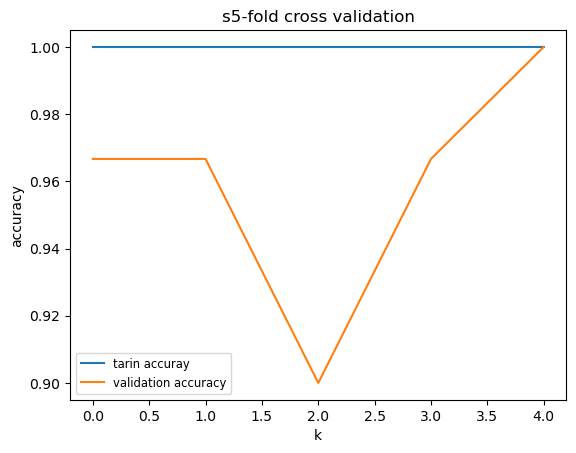

In [93]:
plt.plot(train_acc_list, label='tarin accuray')
plt.plot(val_acc_list, label='validation accuracy')

plt.title('s5-fold cross validation')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(fontsize='small')

plt.show()

- 교차 검증 및 성능 평가 동시 진행형

In [117]:
# cross validation을 더 간단하게 보는 메서드: cross_val_score()

from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [118]:
five_fold_acc = cross_val_score(dtc_model, feature_df, label_sr, scoring='accuracy')
print(f"5-Fold Cross Validation Accuracy: {five_fold_acc}")
print(f"5-Fold Cross Validation Mean Accuracy: {np.mean(five_fold_acc) * 100:.2f} %")

5-Fold Cross Validation Accuracy: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
5-Fold Cross Validation Mean Accuracy: 95.33 %


In [123]:
five_fold_acc = cross_val_score(dtc_model, X_test, y_test, scoring='accuracy')
print(f"5-Fold Cross Validation Accuracy: {five_fold_acc}")
print(f"5-Fold Cross Validation Mean Accuracy: {np.mean(five_fold_acc) * 100:.2f} %")

5-Fold Cross Validation Accuracy: [0.75       1.         0.875      0.85714286 1.        ]
5-Fold Cross Validation Mean Accuracy: 89.64 %


In [122]:
five_fold_pred = cross_val_predict(dtc_model, X_test, y_test)
print(f"f-Fold Cross Validation Prediction: {five_fold_pred}")

f-Fold Cross Validation Prediction: [2 2 2 0 2 1 0 0 0 2 1 0 1 2 2 0 1 1 1 2 0 1 0 2 2 2 1 2 0 0 2 1 2 2 1 0 0
 1]


In [126]:
result = cross_validate(dtc_model, X_test, y_test, return_train_score=True)
result

{'fit_time': array([0.00299358, 0.0030055 , 0.00099683, 0.00199318, 0.00199413]),
 'score_time': array([0.00098515, 0.00098395, 0.00199485, 0.00199437, 0.00099945]),
 'test_score': array([1.        , 1.        , 0.875     , 0.85714286, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [132]:
result = cross_validate(dtc_model, feature_df, label_sr, return_train_score=True, return_estimator=True)
result

{'fit_time': array([0.0019927 , 0.00199461, 0.00301385, 0.00199461, 0.00299239]),
 'score_time': array([0.00199509, 0.00199342, 0.00197339, 0.00099587, 0.00299287]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [133]:
result_df = pd.DataFrame(result).loc[:, ['test_score', 'train_score']]
result_df

,test_score,train_score
0,0.966667,1.0
1,0.966667,1.0
2,0.900000,1.0
3,1.000000,1.0
4,1.000000,1.0


In [135]:
best_model = result['estimator'][3]     # 이걸 일찍 알았다면... 지난학기 과제가 더 간단하게 끝났을텐데...

In [137]:
prediction = best_model.predict(X_test)
prediction

array([2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1,
       0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1])

In [140]:
print(f"recall: {sum(prediction == y_test)/len(prediction)*100:.2f} %")

recall: 100.00 %


- 이거 왜 100% 나와? 미친...
- 데이터가 이상해요...
- 이 모델은 overfitting이 의심됨

In [142]:
prediction == y_test

116    True
68     True
139    True
41     True
78     True
71     True
35     True
18     True
23     True
125    True
82     True
25     True
89     True
138    True
142    True
33     True
67     True
96     True
93     True
135    True
20     True
74     True
49     True
76     True
122    True
146    True
119    True
110    True
1      True
17     True
114    True
73     True
126    True
137    True
87     True
45     True
26     True
56     True
Name: target, dtype: bool

In [144]:
# 전체 datasets 재분해
# train : test = 7.25 : 2.25

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, stratify=label_sr)

In [147]:
result = cross_validate(dtc_model, feature_df, label_sr, return_train_score=True, return_estimator=True)

result_df = pd.DataFrame(result)

result_df

,fit_time,score_time,estimator,test_score,train_score
0,0.001993,0.001994,DecisionTreeClassifier(),0.966667,1.0
1,0.002000,0.000993,DecisionTreeClassifier(),0.966667,1.0
2,0.002992,0.001995,DecisionTreeClassifier(),0.900000,1.0
3,0.001994,0.002012,DecisionTreeClassifier(),0.966667,1.0
4,0.001966,0.001995,DecisionTreeClassifier(),1.000000,1.0


In [148]:
best_model = result['estimator'][4]
prediction = best_model.predict(X_test)

In [149]:
print(f"recall: {sum(prediction == y_test)/len(prediction)*100:.2f} %")

recall: 100.00 %


In [156]:
best_model = result['estimator'][0]
prediction = best_model.predict(X_test)

score = best_model.score(X_test, y_test)
print(f"score: {score} %")

score: 1.0 %
